In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
#1 A. mport ‘signal-data.csv’ as DataFrame
sig_df=pd.read_csv("signal-data.csv")
sig_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
sig_df.shape

(1567, 592)

In [4]:
sig_df.groupby(["Pass/Fail"]).count()

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
Pass/Fail,,,,,,,,,,,,,,,,,,,,,
-1,1463,1457,1457,1449,1449,1449,1449,1449,1454,1461,...,573,573,1462,1462,1462,1462,1462,1462,1462,1462
1,104,104,103,104,104,104,104,104,104,104,...,45,45,104,104,104,104,104,104,104,104


In [5]:
#1 B.Print 5 point summary
#share at least 2 observations.
sig_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


Few columns have std=0, which means those columns should be removed from sig_df dataframe.
1st column signal data was outlier because the data of min and max existed outside the range of (mean+_2sigma). 

In [6]:
sig_df.isnull().sum().sum()

41951

In [7]:
new_sig_df = sig_df.copy()
print(new_sig_df.shape)

(1567, 592)


In [8]:
sig_df1=sig_df.copy()
sig_df1.shape

(1567, 592)

In [9]:
new_sig_df.drop('Time',axis=1,inplace=True)
new_sig_dft=new_sig_df.drop('Pass/Fail',axis=1)
pf = pd.DataFrame(new_sig_df[['Pass/Fail']])
new_sig_dft.shape

(1567, 590)

In [10]:
new_sig_dft.isnull().values.any()

True

In [11]:
#2 A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature
z=pd.DataFrame(new_sig_dft.isnull().sum()/len(new_sig_dft)*100)
np.where(z > 20)

(array([ 72,  73,  85, 109, 110, 111, 112, 157, 158, 220, 244, 245, 246,
        247, 292, 293, 345, 346, 358, 382, 383, 384, 385, 492, 516, 517,
        518, 519, 578, 579, 580, 581], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [12]:
for col in new_sig_dft.columns:
    a = new_sig_dft.loc[:,col].isnull().sum()/len(new_sig_dft)*100
    if(a > 20):
        del new_sig_dft[col]
        print(col)
        print("deleted")
    else:
        new_sig_dft[col].fillna(new_sig_dft.loc[:,col].mean(), inplace = True)
        

72
deleted
73
deleted
85
deleted
109
deleted
110
deleted
111
deleted
112
deleted
157
deleted
158
deleted
220
deleted
244
deleted
245
deleted
246
deleted
247
deleted
292
deleted
293
deleted
345
deleted
346
deleted
358
deleted
382
deleted
383
deleted
384
deleted
385
deleted
492
deleted
516
deleted
517
deleted
518
deleted
519
deleted
578
deleted
579
deleted
580
deleted
581
deleted


In [13]:
new_sig_dft.isnull().sum().sum()

0

In [14]:
new_sig_dft.shape

(1567, 558)

In [15]:
pd.DataFrame(new_sig_dft.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
0,0
1,0
2,0
3,0
4,0
...,...
585,0
586,0
587,0
588,0


In [16]:
#2 B. Identify and drop the features which are having same value for all the rows.
count=0
for col1 in new_sig_dft.columns:
    uni=new_sig_dft[col1].unique()
    if(uni.size==1): #identifying the features which are having same value for all the rows.
        del new_sig_dft[col1] # deleting the features
        count=count+1
print(count)

116


In [17]:
new_sig_dft.head()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


In [18]:
dupes = new_sig_dft.duplicated()
sum(dupes)

0

In [19]:
new_sig_dft.shape

(1567, 442)

In [20]:
new_sig_dft.isnull().values.any()

False

In [21]:
#C. Drop other features if required using relevant functional knowledge. Clearly justify the same.
z=new_sig_dft.corr().abs()
up = z.where(np.triu(np.ones(z.shape), k=1).astype(np.bool))
dp = [column for column in up.columns if any(up[column] > 0.95)]
new_sig_dft.drop(new_sig_dft[dp], axis=1, inplace=True)

C:\Users\nav deepak\AppData\Local\Temp\ipykernel_6436\4188362942.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up = z.where(np.triu(np.ones(z.shape), k=1).astype(np.bool))


We have calculated the correlation matrix and we are going to delete those upper triangular matrix values, whose correlative value is above 95%.

In [22]:
new_sig_dft.shape

(1567, 269)

In [23]:
for col2 in new_sig_dft.columns:
    if (new_sig_dft[col2].std() == 0):
        del new_sig_dft[col2]

In [24]:
new_sig_dft.shape

(1567, 269)

In [25]:
new_sig_dft.isnull().values.any()

False

In [26]:
#2 D. Check for multi-collinearity in the data and take necessary action.

cols = new_sig_dft.columns
cols = cols.delete(0)
X23 = new_sig_dft[cols]
for i in range(len(cols)):
    f_li = [vif(new_sig_dft[cols].values, index) for index in range(len(cols))]
    m_vif = max(f_li)
    print("Max VIF ", m_vif)                     
    di = f_li.index(m_vif)
    print("Independent variable", cols[di])
    
    if m_vif > 10:
        
        print("Deleting", cols[di])
        cols = cols.delete(di)
        print("Final Independent_variables ", cols)



Max VIF  150119987579016.53
Independent variable 70
Deleting 70
Final Independent_variables  Index(['1', '2', '3', '4', '6', '7', '8', '9', '10', '11',
       ...
       '569', '570', '571', '572', '573', '582', '583', '586', '587', '589'],
      dtype='object', length=267)
Max VIF  142971416741920.5
Independent variable 50
Deleting 50
Final Independent_variables  Index(['1', '2', '3', '4', '6', '7', '8', '9', '10', '11',
       ...
       '569', '570', '571', '572', '573', '582', '583', '586', '587', '589'],
      dtype='object', length=266)
Max VIF  12741766.314318612
Independent variable 53
Deleting 53
Final Independent_variables  Index(['1', '2', '3', '4', '6', '7', '8', '9', '10', '11',
       ...
       '569', '570', '571', '572', '573', '582', '583', '586', '587', '589'],
      dtype='object', length=265)
Max VIF  8494022.737675218
Independent variable 12
Deleting 12
Final Independent_variables  Index(['1', '2', '3', '4', '6', '7', '8', '9', '10', '11',
       ...
       '569', 

In [27]:
new_sig_dft = new_sig_dft[cols]
new_sig_df= new_sig_dft.join(pf)
new_sig_df.head()

,4,9,10,23,24,41,59,74,75,76,...,560,564,565,572,573,583,586,587,589,Pass/Fail
0,1.3602,0.0162,-0.0034,-4043.75,751.00,4.515,-1.7264,0.0,0.0126,-0.0206,...,0.1039,6.444985,0.14561,8.95,0.3157,0.0118,0.021458,0.016475,99.670066,-1
1,0.8294,-0.0005,-0.0148,-3498.75,-1640.25,2.773,0.8073,0.0,-0.0039,-0.0198,...,0.0375,6.444985,0.14561,5.92,0.2653,0.0223,0.009600,0.020100,208.204500,-1
2,1.5102,0.0041,0.0013,-4047.00,-1916.50,5.434,23.8245,0.0,-0.0078,-0.0326,...,0.1233,1.100000,0.62190,11.21,0.1882,0.0157,0.058400,0.048400,82.860200,1
3,1.3204,-0.0124,-0.0033,-4515.00,-1657.25,1.279,24.3791,0.0,-0.0555,-0.0461,...,0.2710,7.320000,0.16300,9.33,0.1738,0.0103,0.020200,0.014900,73.843200,-1
4,1.5334,-0.0031,-0.0072,-3987.50,117.00,2.209,-12.2945,0.0,-0.0534,0.0183,...,0.0461,6.444985,0.14561,8.83,0.2224,0.4766,0.020200,0.014900,73.843200,-1


In [28]:
new_sig_df.isnull().values.any()

False

In [29]:
#2 E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.


We have checked and deleted all the features, which has 20%+ Null values. We have checked the duplicates in features. After that we have to check null values. After that we have deleted those features, which have the same value in all rows. After that we have calculated correlation between features and deleted those features whose depenededes more than 95% using the upper triangular matrix. After that I checked the multicollinearity using the VIF method. further we have scope to remove all outliers using upscaling and downscaling.

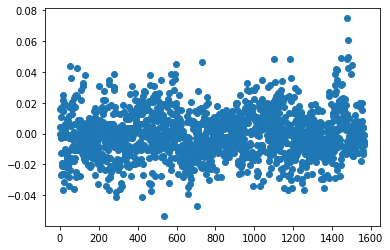

In [30]:
#3 A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

plt.scatter(new_sig_df.index,new_sig_df['9'])
plt.show()

It looks cloud except 2 to 3 data points in plot 

(array([ 10.,  43., 183., 536., 567., 191.,  27.,   6.,   3.,   1.]),
 array([-0.0349 , -0.02611, -0.01732, -0.00853,  0.00026,  0.00905,
         0.01784,  0.02663,  0.03542,  0.04421,  0.053  ]),
 <BarContainer object of 10 artists>)

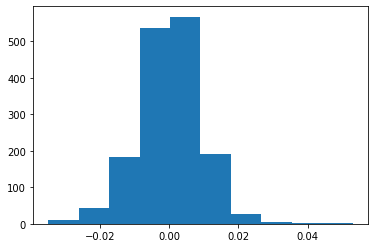

In [31]:
plt.hist(new_sig_df['10'])

This graph distribution left edge represents an outlier. It is not properly distributed

C:\Users\nav deepak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='560'>

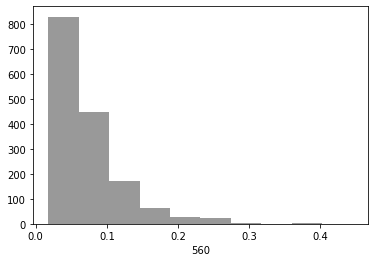

In [32]:
sns.distplot(new_sig_df['560'],kde=False,color='black',bins=10)

This plot represents that the data points are a right skewed distribution.

<AxesSubplot:ylabel='Density'>

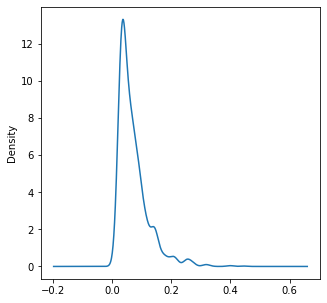

In [33]:
plt.figure(figsize=(5,5))
new_sig_df['560'].plot(kind='density')

the plot has right side outlier.

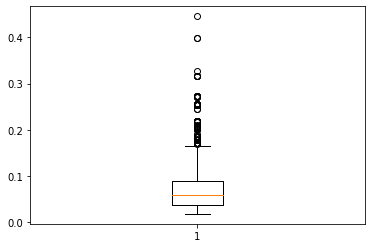

In [34]:
plt.boxplot(new_sig_df['560'])
plt.show()

This box plot is also represents the outliers.

C:\Users\nav deepak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='560', ylabel='9'>

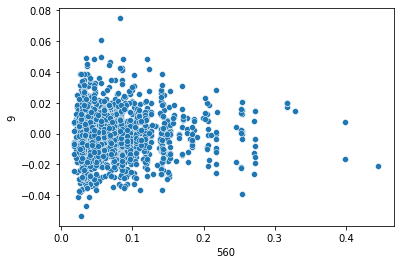

In [35]:
#B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.
sns.scatterplot(new_sig_df['560'], new_sig_df['9'])

This plot represents almost all clouds except the right edge. upper and lower edges represent that the data can be linearly dependent.

C:\Users\nav deepak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='24', ylabel='560'>

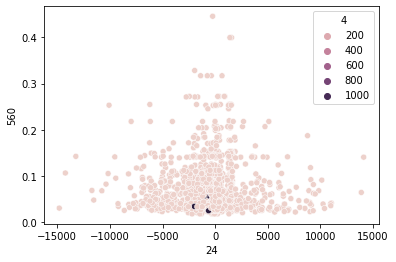

In [36]:
sns.scatterplot(new_sig_df['24'], new_sig_df['560'], hue=new_sig_df['4'])

Feature 24 and 560 linearly dependent and feature density maximum at mid of distribution.

In [37]:
#4 A. Segregate predictors vs target attributes.
X = new_sig_df.iloc[:,:-1]
y = new_sig_df.iloc[:,-1:]
X_arr = X.values
y_arr = y.values

In [38]:
#4 B. Check for target balancing and fix it if found imbalanced. 
new_sig_df.groupby(["Pass/Fail"]).count()

,4,9,10,23,24,41,59,74,75,76,...,551,560,564,565,572,573,583,586,587,589
Pass/Fail,,,,,,,,,,,,,,,,,,,,,
-1,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,...,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
1,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104


In [39]:
new_sig_df[~new_sig_df.applymap(np.isreal).all(1)]

,4,9,10,23,24,41,59,74,75,76,...,560,564,565,572,573,583,586,587,589,Pass/Fail


In [40]:
X.shape

(1567, 114)

In [41]:
y.shape

(1567, 1)

In [42]:
#UPScaling smaller class trainig data
print("Before UpSampling, counts of label '1': {}".format(sum(y_arr==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y_arr==-1)))
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_res, y_res = sm.fit_resample(X_arr, y_arr.ravel())
print("After UpSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y_res==-1)))
print('After UpSampling, the shape of X: {}'.format(X_res.shape))
print('After UpSampling, the shape of y: {} \n'.format(y_res.shape))

Before UpSampling, counts of label '1': [104]
Before UpSampling, counts of label '-1': [1463] 

After UpSampling, counts of label '1': 1463
After UpSampling, counts of label '-1': 1463 

After UpSampling, the shape of X: (2926, 114)
After UpSampling, the shape of y: (2926,) 



In [43]:
#C. Perform train-test split and standardise the data or vice versa if required.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.30, random_state=1)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
scaled_X_train=X_train.apply(zscore)
scaled_X_test=X_test.apply(zscore)

In [44]:
#D. Check if the train and test data have similar statistical characteristics when compared with original data.

In [45]:
sig_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [46]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,...,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,3.513031,-0.001802,0.000479,-3829.278981,-323.375913,3.423181,5.584262,0.002055,-0.006788,-0.033700,...,1.386843,0.073241,6.557922,0.154172,20.997689,0.321311,0.015265,0.021541,0.017165,100.715986
std,49.086211,0.013434,0.008447,1293.567179,2511.155735,2.090670,8.840143,0.092708,0.023450,0.030040,...,1.711943,0.046471,2.191375,0.077815,64.305007,0.188627,0.011318,0.011198,0.008288,82.078271
min,0.681500,-0.041000,-0.032900,-9986.750000,-14804.500000,0.025900,-28.988200,0.000000,-0.104900,-0.186200,...,0.120000,0.017700,0.970000,0.022400,3.540000,0.066700,0.006000,-0.006000,0.003200,0.000000
25%,1.097916,-0.009841,-0.004648,-4426.608367,-1376.796402,2.735147,-0.526287,0.000000,-0.019726,-0.052375,...,0.943024,0.039292,4.980000,0.095444,7.570000,0.231292,0.011698,0.014500,0.011500,50.065000
50%,1.314885,-0.002294,0.001127,-3855.465512,-76.267893,3.136500,3.187548,0.000000,-0.006309,-0.034400,...,1.230712,0.060868,6.444985,0.145610,8.779641,0.291400,0.013900,0.020716,0.015718,77.200790
75%,1.499711,0.005875,0.005900,-3395.683649,1154.075733,3.774481,10.701388,0.000000,0.005222,-0.014957,...,1.360000,0.092825,7.510000,0.180014,9.972500,0.359925,0.016773,0.027500,0.021000,121.097123
max,1114.536600,0.074900,0.036600,2287.000000,14106.000000,37.880000,53.681800,4.195500,0.231500,0.068300,...,25.470000,0.445700,32.580000,0.689200,454.560000,2.196700,0.471400,0.102800,0.079900,706.824000


In [47]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1.322805,-0.001464,0.000702,-3765.552302,-353.300725,3.325875,5.282528,0.000003,-0.005223,-0.032987,...,1.376026,0.075443,6.525028,0.152387,25.999127,0.329456,0.015430,0.021400,0.016622,96.370088
std,0.386309,0.013375,0.008740,1326.742770,2536.233911,0.964081,10.561946,0.000091,0.025322,0.029421,...,1.997954,0.047284,2.207462,0.078715,78.168485,0.214179,0.016398,0.010870,0.007957,82.546974
min,0.721700,-0.053400,-0.034900,-9141.500000,-13232.500000,-0.075900,-19.151800,0.000000,-0.088400,-0.148426,...,0.259178,0.017700,1.120000,0.022600,5.220000,0.066700,0.007100,-0.016900,0.004200,0.000000
25%,1.060084,-0.009298,-0.004300,-4374.000000,-1361.361385,2.736000,-0.758442,0.000000,-0.018094,-0.049701,...,0.930840,0.040225,4.980000,0.094100,7.572500,0.227460,0.011700,0.014200,0.011000,47.023177
50%,1.315394,-0.001400,0.001085,-3845.985671,-81.472067,3.137000,2.634137,0.000000,-0.006600,-0.033000,...,1.230712,0.063132,6.301713,0.144396,8.709464,0.287293,0.013893,0.020585,0.015456,75.618137
75%,1.488400,0.006200,0.006028,-3358.306866,1220.525580,3.805720,9.241575,0.000000,0.005775,-0.014600,...,1.330000,0.095206,7.610000,0.172499,10.142500,0.357000,0.016497,0.027675,0.020577,116.682600
max,4.197013,0.060900,0.053000,2363.000000,9503.333300,6.250000,168.145500,0.002688,0.225030,0.072300,...,39.330000,0.399500,15.070000,0.614961,452.540000,2.196700,0.476600,0.102800,0.070100,737.304800


In [48]:
# 5 A. Use any Supervised Learning technique to train a model.

model = LogisticRegression()
model.fit(scaled_X_train, y_train)
model_score = model.score(scaled_X_test, y_test)
print(model_score)

0.8154897494305239


In [49]:
# 5 B. Use cross validation techniques
#K-fold techniques
num_folds = 50
kfold = KFold(n_splits=num_folds, random_state=7,shuffle=True)
model1 = LogisticRegression()
results = cross_val_score(model1, scaled_X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.63414634 0.7804878  0.85365854 0.87804878 0.7804878  0.87804878
 0.75609756 0.90243902 0.7804878  0.82926829 0.65853659 0.80487805
 0.82926829 0.80487805 0.85365854 0.85365854 0.85365854 0.75609756
 0.80487805 0.75609756 0.90243902 0.75609756 0.85365854 0.90243902
 0.82926829 0.85365854 0.80487805 0.90243902 0.75609756 0.80487805
 0.82926829 0.92682927 0.75609756 0.90243902 0.82926829 0.80487805
 0.90243902 0.92682927 0.70731707 0.80487805 0.75609756 0.82926829
 0.82926829 0.92682927 0.87804878 0.68292683 0.82926829 0.80487805
 0.8        0.825     ]
Accuracy: 81.933% (6.636%)


In [50]:
# prepare cross validation (Leave One Out)

loocv = LeaveOneOut()
model2 = LogisticRegression()
results = cross_val_score(model2, scaled_X_train, y_train, cv=loocv)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1. 1. 1. ... 1. 1. 1.]
Accuracy: 82.422% (38.063%)


In [51]:
#5 C. Apply hyper-parameter tuning techniques to get the best accuracy
knn_clf = RandomForestClassifier(n_estimators=50)
knn_clf.fit(scaled_X_train, y_train)
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
gs = GridSearchCV(knn_clf,param_grid)
gs.fit(scaled_X_train, y_train)
gs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [52]:
gs.cv_results_['mean_test_score']

array([0.88672193, 0.87304431, 0.8755048 , 0.87206393, 0.88818057,
       0.86427098, 0.86378556, 0.87549407, 0.87549645, 0.87500268,
       0.87598068, 0.88426978, 0.87060767, 0.8857499 , 0.87939531,
       0.87500865, 0.87256008, 0.87159163, 0.8608468 , 0.8637784 ,
       0.866221  , 0.8618248 , 0.86230425, 0.86279921, 0.86035661,
       0.86084799, 0.86865526, 0.9780297 , 0.98144314, 0.96631284,
       0.96533842, 0.96826525, 0.96582265, 0.93603793, 0.93701234,
       0.93798915, 0.98144552, 0.98047349, 0.97070905, 0.96972628,
       0.97705767, 0.96923967, 0.94970958, 0.94775836, 0.94384638,
       0.9765639 , 0.97607729, 0.97168346, 0.96728487, 0.96191186,
       0.96190948, 0.94238416, 0.94238178, 0.93750015, 0.87890989,
       0.88525971, 0.87499433, 0.89159163, 0.87891109, 0.86133938,
       0.87647564, 0.8759771 , 0.88087423, 0.88281114, 0.8779319 ,
       0.86572485, 0.87207585, 0.87158924, 0.87940128, 0.87842567,
       0.87744767, 0.88281472, 0.86279086, 0.86768561, 0.86767

In [53]:
#RandomizedSearch
samples = 10
clf = RandomForestClassifier(n_estimators=50)
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples)
randomCV.fit(scaled_X_train, y_train)
print(randomCV.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 9}


In [54]:
randomCV.cv_results_['mean_test_score']

array([0.96777506, 0.9711885 , 0.87842686, 0.87403423, 0.97949192,
       0.94677798, 0.9487304 , 0.95459598, 0.96142763, 0.94482319])

In [55]:
# Q5 D - Use any other technique/method which can enhance the model performance. 

sig_df1.drop('Time',axis=1,inplace=True)
sig_df1 = sig_df1.apply(lambda x: x.fillna(x.median()),axis=0)


X1 = sig_df1.drop('Pass/Fail', axis=1)
y1 = sig_df1[['Pass/Fail']]


In [56]:
for col3 in X1.columns:
    if (X1[col3].std() == 0):
        del X1[col3]

In [57]:
sig_df1.groupby(["Pass/Fail"]).count()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
Pass/Fail,,,,,,,,,,,,,,,,,,,,,
-1,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,...,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
1,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104


In [58]:
X_arr1 = X1.values
y_arr1 = y1.values

In [59]:
#UPScaling smaller class trainig data
print("Before UpSampling, counts of label '1': {}".format(sum(y_arr1==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y_arr1==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_res1, y_res1 = sm.fit_resample(X_arr1, y_arr1.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_res1==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y_res1==-1)))



print('After UpSampling, the shape of X: {}'.format(X_res1.shape))
print('After UpSampling, the shape of y: {} \n'.format(y_res1.shape))


Before UpSampling, counts of label '1': [104]
Before UpSampling, counts of label '-1': [1463] 

After UpSampling, counts of label '1': 1463
After UpSampling, counts of label '-1': 1463 

After UpSampling, the shape of X: (2926, 474)
After UpSampling, the shape of y: (2926,) 



In [60]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res1, y_res1, test_size=0.30, random_state=1)
X_train1=pd.DataFrame(X_train1)
X_test1=pd.DataFrame(X_test1)
scaled_X_train1=X_train1.apply(zscore)
scaled_X_test1=X_test1.apply(zscore)

In [61]:
X_res1.shape

(2926, 474)

In [62]:
X1.head()

,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.0047,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.0047,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [63]:
pca = PCA(n_components=114)
pca.fit(X_res1)
print(pca.components_)
print(pca.explained_variance_ratio_)
xpca = pca.transform(X_res1)

[[ 1.35774719e-03 -1.70708634e-04 -2.19603828e-04 ... -7.59214592e-08
  -2.08505888e-08 -1.11877300e-03]
 [ 1.12309911e-03  7.40952200e-04 -9.03725279e-05 ...  1.98006948e-10
  -4.26109562e-09  1.24212764e-03]
 [ 4.31898392e-04  2.72593040e-03 -2.53067226e-05 ...  3.31233820e-07
   1.02788050e-07  2.12072231e-03]
 ...
 [ 3.67406292e-03  3.88669667e-03  5.93281308e-03 ...  7.88644165e-05
   2.20273563e-05  2.83047523e-03]
 [-1.11195431e-04 -8.07118218e-04  3.97106230e-03 ...  1.21123310e-04
   3.00906248e-05 -2.83404459e-03]
 [ 1.26264170e-03 -1.02358792e-03  1.73442964e-03 ...  5.29305774e-05
   7.74370944e-06 -4.85364013e-03]]
[6.05857247e-01 2.22809390e-01 8.19108561e-02 3.70001317e-02
 1.67627683e-02 5.11870135e-03 3.41453991e-03 2.94750622e-03
 2.38597386e-03 2.26301465e-03 2.06575627e-03 1.86186804e-03
 1.49983330e-03 1.29461804e-03 1.26472356e-03 1.14832097e-03
 1.10202061e-03 9.24324730e-04 8.94875335e-04 8.02380825e-04
 7.33851357e-04 7.11977295e-04 6.07040820e-04 5.32317795e-0

In [64]:
clf1 = SVC()
clf1.fit( xpca, y_res1)
clf1.score(xpca, y_res1)

0.7939166097060834

In [65]:
#E. Display and explain the classification report in detail. 
y_pred1 = clf1.predict(xpca)
print(classification_report(y_res1, y_pred1))

              precision    recall  f1-score   support

          -1       0.87      0.69      0.77      1463
           1       0.74      0.90      0.81      1463

    accuracy                           0.79      2926
   macro avg       0.81      0.79      0.79      2926
weighted avg       0.81      0.79      0.79      2926



As we can see from the classification report, Precision = TP/(TP + FP): Accuracy of positive predictions, which is .87 and .74 in case of -1 and 1 respectively. Recall = TP/(TP+FN): Fraction of positives that were correctly identified, which is .69 and .90 in case of -1 and 1 respectively. F1 score= 2*(Recall * Precision) / (Recall + Precision): percent of positive predictions were correct, which is .77 and .81 in case of -1 and 1 respectively. the overall accuracy is 79%.

In [66]:
#F. Apply the above steps for all possible models that you have learnt so far.


In [67]:
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [68]:
ridge = Ridge()
ridge.fit(scaled_X_train, y_train)

Ridge()

In [69]:
lasso = Lasso()
lasso.fit(scaled_X_train, y_train)

Lasso()

In [70]:
modell = LogisticRegression(solver="liblinear")
modell.fit(scaled_X_train, y_train)


LogisticRegression(solver='liblinear')

In [71]:
modelg = GaussianNB()
modelg.fit(scaled_X_train, y_train)


GaussianNB()

In [72]:
knn = KNeighborsClassifier(n_neighbors= 5 )
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [73]:
clf = svm.SVC() 
clf.fit(scaled_X_train, y_train)

SVC()

In [74]:
rfc = RandomForestClassifier(n_estimators=150,)
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [75]:
#6 A. Display and compare all the models designed with their train and test accuracies

print(lr.score(scaled_X_train, y_train))
print(lr.score(scaled_X_test, y_test))

0.47090845392946645
0.35170912056512904


In [76]:
print(ridge.score(scaled_X_train, y_train))
print(ridge.score(scaled_X_test, y_test))

0.4709079276255316
0.35191131009964427


In [77]:
print(lasso.score(scaled_X_train, y_train))
print(lasso.score(scaled_X_test, y_test))

0.0
-0.0002648232115523008


In [78]:
print(modell.score(scaled_X_train, y_train))
print(modell.score(scaled_X_test, y_test))

0.84716796875
0.8143507972665148


In [79]:
print(modelg.score(scaled_X_train, y_train))
print(modelg.score(scaled_X_test, y_test))

0.62353515625
0.5056947608200456


In [80]:
print(knn.score(scaled_X_train, y_train))
print(knn.score(scaled_X_test, y_test))

0.7080078125
0.6537585421412301


In [81]:
print(clf.score(scaled_X_train, y_train))
print(clf.score(scaled_X_test, y_test))

0.99853515625
0.989749430523918


In [82]:
print(rfc.score(scaled_X_train, y_train))
print(rfc.score(scaled_X_test, y_test))

1.0
0.9760820045558086


In [83]:
#6 B. Select the final best trained model along with your detailed comments for selecting this model. 

y_pred1 = clf.predict(scaled_X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       444
           1       0.98      1.00      0.99       434

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



In [84]:
#6 C. Pickle the selected model for future use.
import pickle as pk
fname = 'finalized_model.sav'
pk.dump(clf, open(fname, 'wb'))

model_loded = pk.load(open(fname, 'rb'))
r = model_loded.score(scaled_X_test, y_test)
print(r)

0.989749430523918


In [85]:
#6 D. Write your conclusion on the results.

After analysing  training and testing on most of the models, we have got the best accuracy for the Support Vector Machine. which is 98.97%. 